In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df1 = pd.read_csv("Players_Medal_List_Asian.csv")
df2 = pd.read_csv("Medal_List_Asian.csv")
df3 = pd.read_csv("Players_Medal_List_Olympics.csv")
df4 = pd.read_csv("Medal_List_Olympics.csv")

# Individual vs Team Sports

In [5]:
def plotBar(x, y, labels, xlabel = "", ylabel = "", title = "", figs = (15,10)):
    fig, ax = plt.subplots(figsize = figs)
    width = 1.0/(len(y)+2)
    x_axis = np.arange(len(x))
    p = []
    for idx,y_axis in enumerate(y):
        p.append(ax.bar(x_axis + idx*width, y_axis, width, label=labels[idx]))

    ax.axhline(0, color='grey', linewidth=0.8)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x_axis + width/len(y))
    ax.set_xticklabels(x, rotation = 90)
    ax.legend()

    for i in p:
        ax.bar_label(i, label_type='edge')

    return fig

In [6]:
def indi_team_table(df_p, game, year = "Overall", medal = "Total"):

    cols = ["Country", "Sport_Type"]
    if year != "Overall":
        cols.append("Year")
        df_p = df_p[df_p["Year"] == year]
    
    sol = df_p.groupby(["Event", "Country", "Year", "Sport", "Sport_Type", "Gold", "Silver", "Bronze"], as_index = False).agg("sum")
    sol = sol.groupby(cols, as_index = False).agg("sum")
    if year == "Overall":
        sol = sol.drop("Year", axis = 1)
    
    tot = [(row["Gold"] + row["Silver"] + row["Bronze"]) for idx, row in sol.iterrows()]
    sol["Total"] = tot
    
    #total medals
    tot_i = sol[sol["Sport_Type"] != "Team"][medal].sum()
    tot_t = sol[sol["Sport_Type"] == "Team"][medal].sum()
    
    countries = pd.unique(sol["Country"]).tolist()
    
    #percentage of Individual medals country-wise
    tot_i_c = []
    for country in countries:
        temp = sol[(sol["Country"] == country) & (sol["Sport_Type"] != "Team")]
        tot = temp[medal].sum()
        tot_i_c.append(round(tot/tot_i * 100, 1))
    
    #percentage of Team medals country-wise
    tot_t_c = []
    for country in countries:
        temp = sol[(sol["Country"] == country) & (sol["Sport_Type"] == "Team")]
        tot = temp[medal].sum()
        tot_t_c.append(round(tot/tot_t * 100, 1))
        
    #Ploting Graph
    fsize = (20,10)
    
    xlabel = "Countries"
    ylabel = "Percentage of medals"
    
    if year == "Overall":
        year = ""
    
    output = {"Country": countries, "Indi-Medal-Percent": tot_i_c, "Team-Medal-Percent": tot_t_c}
    output = pd.DataFrame(output)
    output.sort_values(by=['Indi-Medal-Percent', 'Team-Medal-Percent', 'Country'], ignore_index = True, ascending=False, inplace = True)
    if len(output) > 15:
        i_c = 0
        t_c = 0
        for i in range(15, len(output)):
            i_c += output["Indi-Medal-Percent"][i]
            t_c += output["Team-Medal-Percent"][i]
        output.drop([i for i in range(15, len(output))], inplace = True)
        output.loc[len(output.index)] = ['Others', i_c, t_c]
        
    title = f"Percentage of {medal} Medals won in Individual and Team Sports Country-wise in {game} {year}"
    fig = plotBar(output["Country"], [output["Indi-Medal-Percent"], output["Team-Medal-Percent"]], ["Individual", "Team"], xlabel, ylabel, title, figs = fsize)
    
    return sol, fig

(        Country Sport_Type  Gold  Silver  Bronze  Total
 0   Afghanistan     Single     0       3       8     11
 1   Afghanistan       Team     0       2       0      2
 2       Bahrain     Single    29      19      19     67
 3       Bahrain       Team     1       3       1      5
 4    Bangladesh     Single     0       0       1      1
 ..          ...        ...   ...     ...     ...    ...
 84   Uzbekistan     Single    72      91     106    269
 85   Uzbekistan       Team    11      26      31     68
 86      Vietnam     Single    11      50      59    120
 87      Vietnam       Team     1       7      12     20
 88        Yemen     Single     0       0       2      2
 
 [89 rows x 6 columns],
 <Figure size 1440x720 with 1 Axes>)

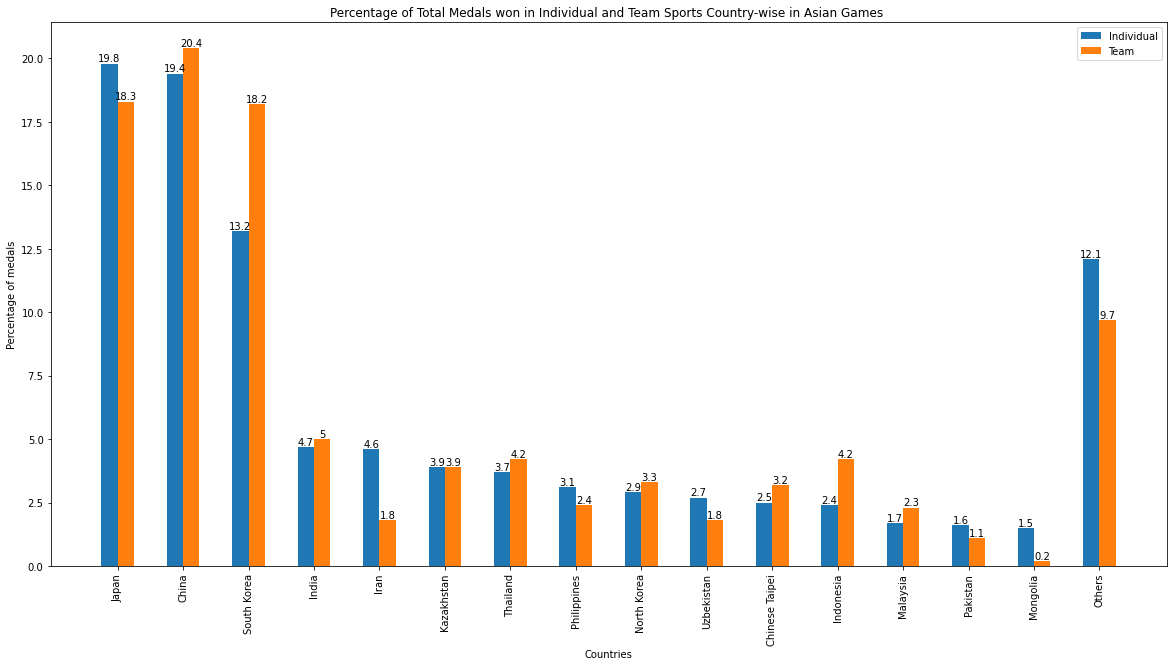

In [7]:
indi_team_table(df1, "Asian Games")

(                 Country  Sport_Type  Gold  Silver  Bronze  Total
 0            Afghanistan  Individual     0       0       2      2
 1                Bahrain  Individual     1       2       1      4
 2                  China  Individual   199     142     137    478
 3                  China        Team    66      52      34    152
 4         Chinese Taipei  Individual     4       8      17     29
 5         Chinese Taipei        Team     1       3       3      7
 6              Hong Kong  Individual     2       2       3      7
 7              Hong Kong        Team     0       1       1      2
 8                  India  Individual     2       6      13     21
 9                  India        Team     4       1       3      8
 10             Indonesia  Individual     3       9      12     24
 11             Indonesia        Team     5       4       2     11
 12                  Iran  Individual    21      23      30     74
 13                  Iraq  Individual     0       0       1   

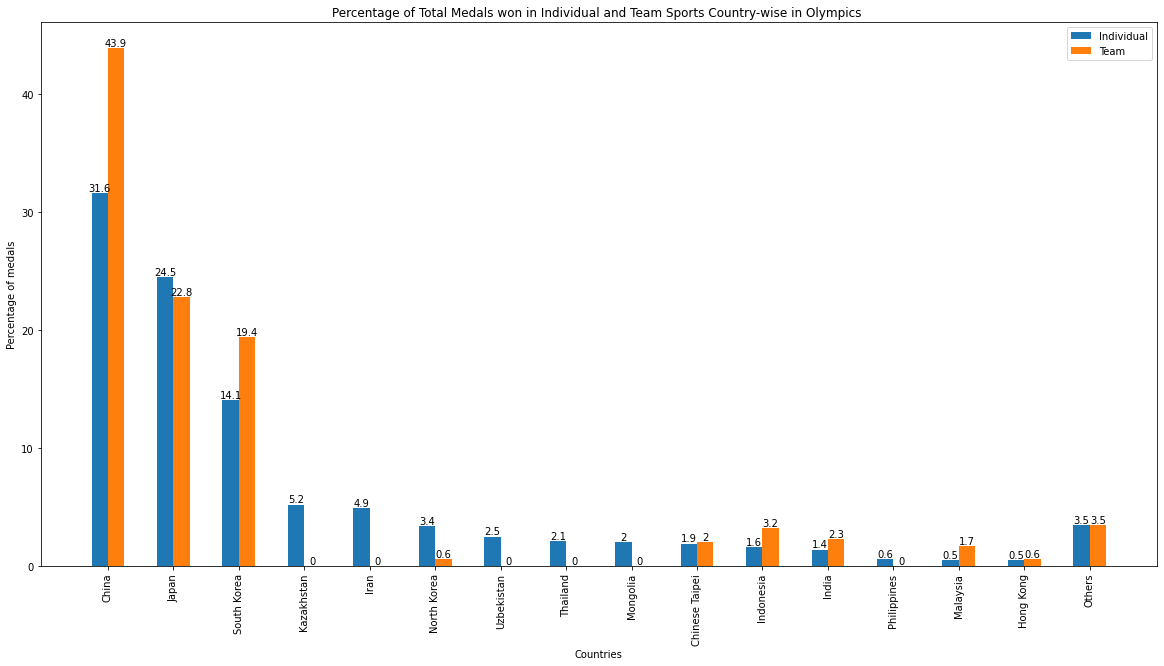

In [8]:
indi_team_table(df3, "Olympics")

Here, graph shows the the country-wise percentage of individual medals to team medals. 

We can see, China, South Korea are some of the top countries who performs better in team sports as compared to individual sport. Top performing countries like Japan, performs better in individual sports compared to team sports. India does slightly better in team sports to individual sports.

We can alse see same traits in both Asian games as well as Olympics.

Here, table shows medal count of individual and team sports country-wise.